<a href="https://colab.research.google.com/github/mpky/abrams_yolo_v2/blob/master/Abrams_YOLO_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Colab_Projects/Abrams_YOLO_v2

/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/Abrams_YOLO_v2


In [0]:
!ls

Abrams_YOLO_v2.ipynb  darkflow


In [0]:
# !git clone https://github.com/thtrieu/darkflow
!ls

Abrams_YOLO_v2.ipynb  darkflow


In [0]:
%cd darkflow
# !python3 setup.py build_ext --inplace

/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/Abrams_YOLO_v2/darkflow


In [0]:
# !wget https://pjreddie.com/media/files/yolov2.weights -P ./bin

In [0]:
# Test video

# !python flow --model cfg/yolo.cfg \
# --load bin/yolov2.weights \
# --demo bike_riding.mp4 \
# --gpu 0.8 \
# --saveVideo

In [0]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3,
    'gpu':0.85
}

tfnet = TFNet(options)

/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/Abrams_YOLO_v2/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.736854076385498s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2     

In [0]:
# Test image with bikes
img = cv2.imread('test_image_bikes.jpg')

result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 2991, 'y': 2724},
  'confidence': 0.85339236,
  'label': 'person',
  'topleft': {'x': 2574, 'y': 1442}},
 {'bottomright': {'x': 2057, 'y': 2551},
  'confidence': 0.48263186,
  'label': 'person',
  'topleft': {'x': 1548, 'y': 1934}},
 {'bottomright': {'x': 5525, 'y': 2556},
  'confidence': 0.55338436,
  'label': 'person',
  'topleft': {'x': 4953, 'y': 2202}},
 {'bottomright': {'x': 2033, 'y': 2740},
  'confidence': 0.7526957,
  'label': 'bicycle',
  'topleft': {'x': 876, 'y': 1925}},
 {'bottomright': {'x': 4010, 'y': 2737},
  'confidence': 0.8586558,
  'label': 'bicycle',
  'topleft': {'x': 2870, 'y': 1910}},
 {'bottomright': {'x': 5724, 'y': 2774},
  'confidence': 0.6336031,
  'label': 'motorbike',
  'topleft': {'x': 4573, 'y': 2400}},
 {'bottomright': {'x': 4120, 'y': 2499},
  'confidence': 0.32338184,
  'label': 'backpack',
  'topleft': {'x': 3681, 'y': 1907}}]

In [0]:
!ls
!cat labels.txt

bike_riding.mp4  darkflow	      labels.txt	  README.md
bin		 demo.gif	      LICENSE		  sample_img
build		 flow		      new_model_data_2	  setup.py
cfg		 KH_abrams_1.jpg      OLD_new_model_data  test
ckpt		 KH_abrams_2_jpg.jpg  preview.png	  test_image_bikes.jpg
abrams

In [0]:
!ls ./new_model_data_2/abrams_images/ -1q *.png | wc -l

1291


In [0]:
# Flow the annotations and images in
# Note that the cfg file needs to match up with weights

!python flow --model cfg/tiny-yolo-voc-abrams.cfg \
--load bin/tiny-yolo-voc.weights \
--train \
--annotation new_model_data_2/abrams_annotations/ \
--dataset new_model_data_2/abrams_images/ \
--gpu 0.85 \
--epoch 300


Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.572850227355957s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2     

In [0]:
# !python flow --model cfg/tiny-yolo-voc-1c.cfg \
# --load -1 \
# --train \
# --annotation new_model_data/annotations \
# --dataset new_model_data/images \
# --gpu 0.8 \
# --epoch 300

Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 9.989738464355469e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

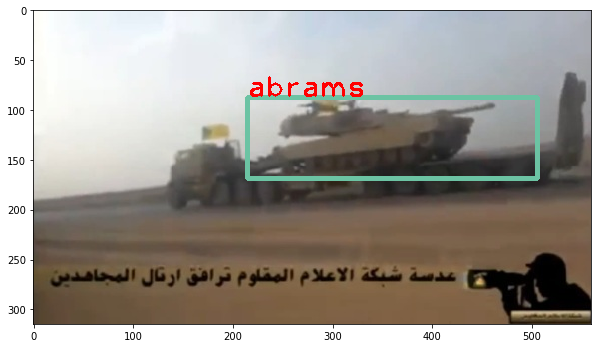

In [0]:
# Test out the model
# Confidence isn't high but it is detecting a tank
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'model':'cfg/tiny-yolo-voc-abrams.cfg',
    'load': -1,
    'threshold':0.1,
    'gpu':0.8
}

tfnet = TFNet(options)

import numpy as np

img = cv2.imread('KH_abrams_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

print(results)

colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 3)
    frame = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)

plt.figure(figsize=(10,20))
plt.imshow(frame)
plt.show()



Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 0.0001819133758544922s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

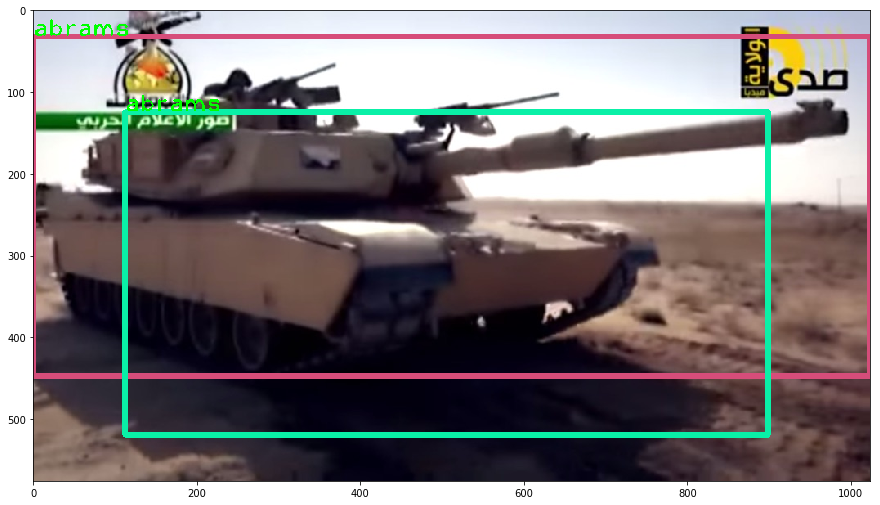

In [0]:
# Detecting two tanks with low confidence

import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'model':'cfg/tiny-yolo-voc-abrams.cfg',
    'load': -1,
    'threshold':0.01,
    'gpu':0.8
}

tfnet = TFNet(options)

import numpy as np

img = cv2.imread('KH_abrams_2_.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

print(results)

colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 5)
    frame = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

plt.figure(figsize=(15,15))
plt.imshow(frame)
plt.show()



Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 0.00016021728515625s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 1

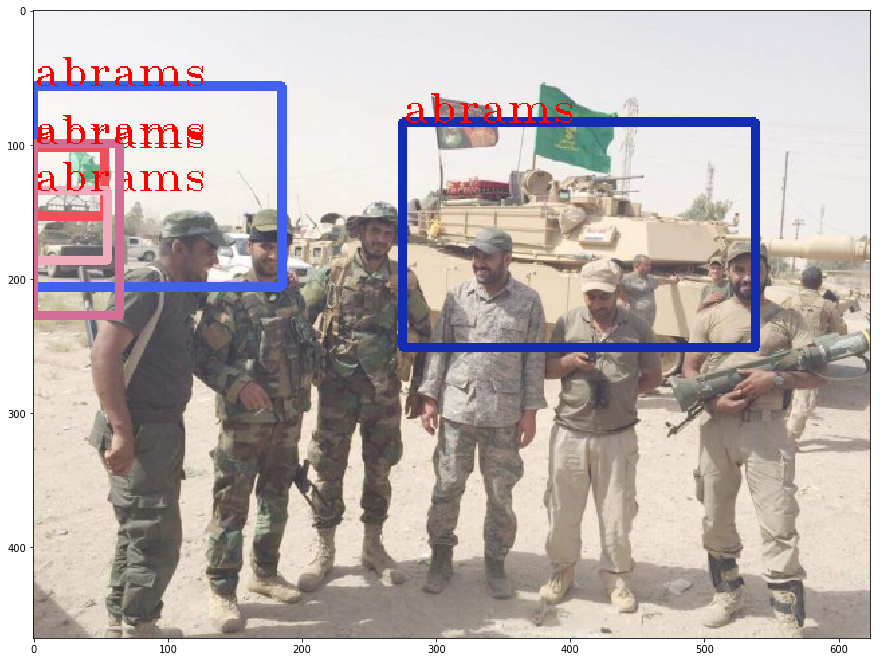

In [0]:
# Unclear why it's detecting so many on the left side of the image

import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'model':'cfg/tiny-yolo-voc-abrams.cfg',
    'load': -1,
    'threshold':0.01,
    'gpu':0.8
}

tfnet = TFNet(options)



import numpy as np

img = cv2.imread('badr_abrams_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

print(results)

colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 5)
    frame = cv2.putText(img, label, tl, cv2.cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 1)

plt.figure(figsize=(15,15))
plt.imshow(frame)
plt.show()

In [0]:
!python flow --model cfg/tiny-yolo-voc-abrams.cfg \
--load -1 \
--demo test_abrams_KH_video_1.m4v \
--threshold 0.2 \
--gpu 0.8 \
--saveVideo


Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 7.557868957519531e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | 

Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 7.891654968261719e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

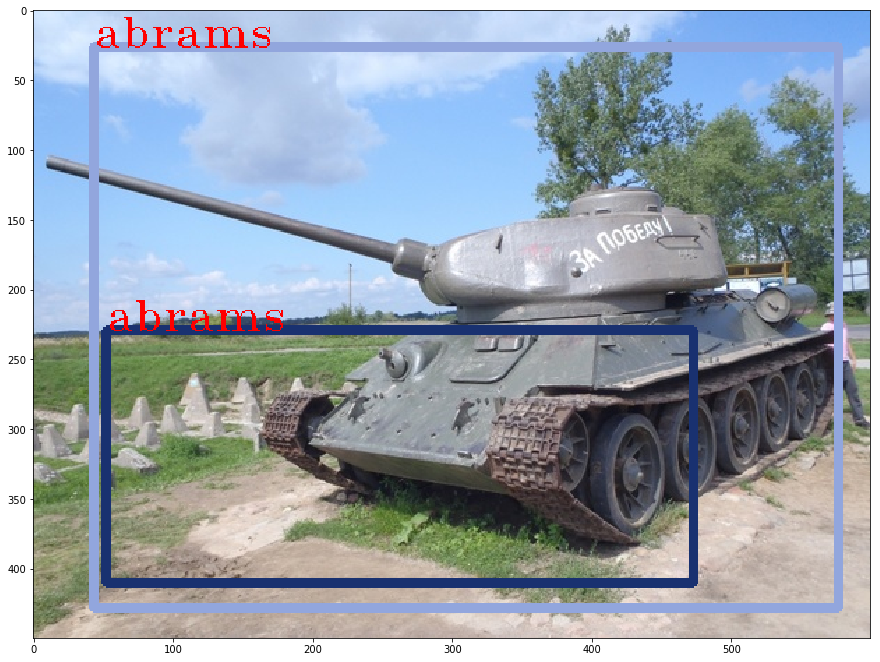

In [0]:
# Failed to detect this is not an Abrams tank
# Next step could be to expand classes to other types of tanks

import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'model':'cfg/tiny-yolo-voc-abrams.cfg',
    'load': -1,
    'threshold':0.01,
    'gpu':0.8
}

tfnet = TFNet(options)



import numpy as np

img = cv2.imread('not_abrams_test_2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

print(results)

colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 5)
    frame = cv2.putText(img, label, tl, cv2.cv2.FONT_HERSHEY_TRIPLEX, 1, (255, 0, 0), 1)

plt.figure(figsize=(15,15))
plt.imshow(frame)
plt.show()

In [0]:
# Try a video from militia convoy
!python flow --model cfg/tiny-yolo-voc-abrams.cfg \
--load -1 \
--demo abrams_convoy_test.mp4 \
--threshold 0.1 \
--gpu 0.8 \
--saveVideo


Parsing cfg/tiny-yolo-voc-abrams.cfg
Loading None ...
Finished in 8.869171142578125e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | 